# Two holes interferometer

In [22]:
from IPython.display import HTML
HTML('''
        <style>
                .prompt{display: None;}
                
                .output_wrapper button.btn.btn-default,
                .output_wrapper .ui-dialog-titlebar {display: none;} <!-- hide toolbars and buttons of the plot -->
                
        </style>
        <script>
            code_show=true; 
            function code_toggle() {
                 if (code_show){
                     $('div.input').hide();
                 } else {
                     $('div.input').show();
                 }
                 code_show = !code_show
            } 
            $( document ).ready(code_toggle);
        </script>
        The raw code for this IPython notebook is by default hidden for easier reading.
        To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.'''
    )

In [23]:
!pip install lightpipes

<img src="./images/twoholessetup.png">

   *Two Holes interferometer*

Executed with python version: 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
using LightPipes version: 1.1.3


<IPython.core.display.Javascript object>


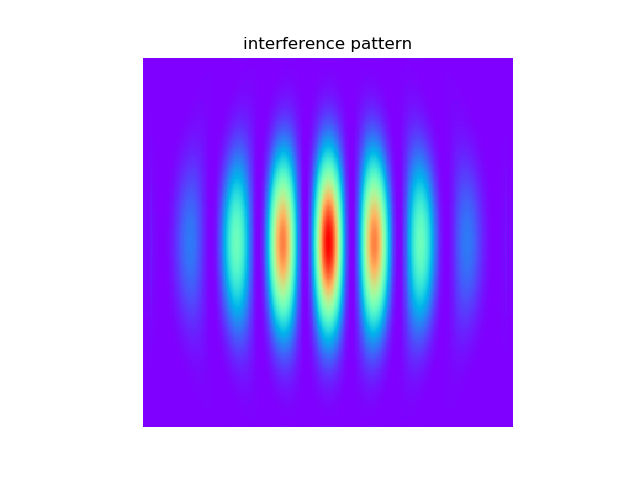

interactive(children=(FloatSlider(value=20.0, description='z [cm]', min=0.0001, step=10.0), FloatSlider(value=…

In [24]:
#! python3
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import sys
print('Executed with python version: ' + sys.version)
from LightPipes import *
print('using LightPipes version: ' + LPversion)

wavelength=20.0*um
size=30.0*mm
N=300
fig = plt.figure()
ax = fig.add_subplot(111)
ax.format_coord = lambda x, y: 'x=%2.2f mm,y=%2.2f mm' % ((-size/2 + x*size/N)/mm, (size/2 - y*size/N)/mm)
def TwoHolesSim(z,R,d):
    F=Begin(size,wavelength,N)
    F1=CircAperture(R*mm, -d*mm/2.0,0, F)
    F2=CircAperture(R*mm, d*mm/2.0,0, F)    
    F=BeamMix(F1,F2)
    F=Fresnel(z*cm,F)
    I=Intensity(0,F)
   #plt.contourf(I,50); plt.axis('equal')
    plt.imshow(I,cmap='rainbow');plt.axis('off');plt.title("interference pattern")
    plt.show()


w=interact(TwoHolesSim,
           z=widgets.FloatSlider(description='z [cm]',min=0.0001,max=100.0,step=10.0,value=20.0),
           R=widgets.FloatSlider(description='R [mm]',min=0.0,max=1.0,step=0.05,value=0.1),
           d=widgets.FloatSlider(description='d [mm]',min=0.0,max=5.0,step=0.1,value=1.0)
          );